In [32]:
%matplotlib inline 
#plot嵌入notebook
import random
import torch
from d2l import torch as d2l

In [33]:
def synthetic_data(w, b, num_examples):
    '''生成 y = Xw + b + 噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1,1)

true_w = torch.tensor([3, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [34]:
print('features:', features[0], '\nlabel:',labels[0])

features: tensor([-1.7360, -0.1265]) 
label: tensor([-0.5826])


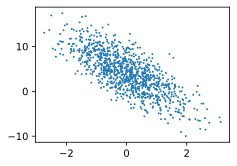

In [35]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [36]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
                indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7154, -0.9263],
        [-1.2517, -0.1830],
        [-1.4069, -0.0951],
        [ 0.1645, -0.5550],
        [ 1.0490, -0.6299],
        [ 0.3603,  1.9769],
        [ 0.1735, -1.3831],
        [ 0.2259,  1.5039],
        [ 1.7333,  0.6648],
        [ 1.3819,  1.5889]]) 
 tensor([[ 9.5001],
        [ 1.0671],
        [ 0.3037],
        [ 6.5856],
        [ 9.4879],
        [-1.4417],
        [ 9.4157],
        [-0.2397],
        [ 7.1151],
        [ 2.9444]])


### 模型参数

In [47]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [38]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [39]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 /2

In [40]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            #tensor数据这种遍历方式直接可以改对应地址的数据

### 训练

In [48]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.044455
epoch 2, loss 0.000151
epoch 3, loss 0.000051
